In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [4]:
iris = pd.read_table("./src/Iris.txt", sep="\t")
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# on supprime la variable species
X = iris.drop("Species", axis=1)
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## ACP

In [7]:
pca = PCA(n_components=4)

# scale permet de normaliser chaque feature
pca.fit(scale(X))

PCA(n_components=4)

In [8]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [9]:
pca.singular_values_

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [10]:
pca.mean_

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

### Calcul des valeurs propres (eigenvalues)

In [11]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.93808505 0.9201649  0.14774182 0.02085386]
[0.72962445 0.22850762 0.03668922 0.00517871]


In [13]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x+1) for x in range(len(pca.explained_variance_))], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.938085,73.0,73.0
1,Dim2,0.920165,23.0,96.0
2,Dim3,0.147742,4.0,99.0
3,Dim4,0.020854,1.0,100.0


### Choix du nombre de facteurs

#### Premier graphique : diagramme des variances expliquées

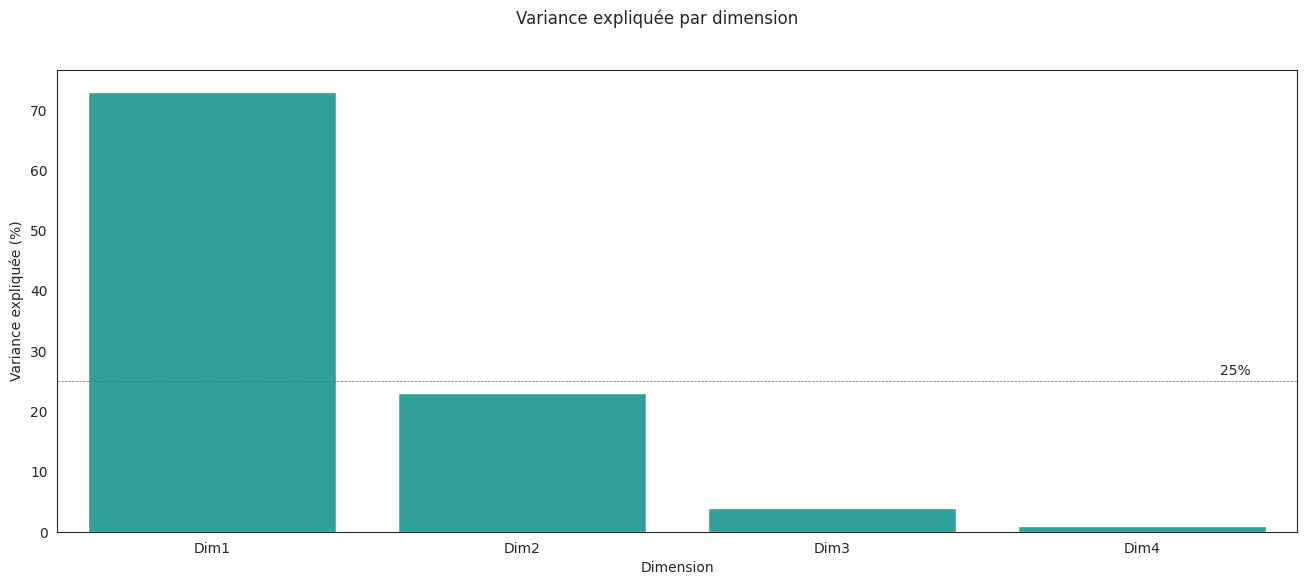

In [14]:
plt.figure(figsize=(16,6))

g_eig = sns.barplot(data=eig, x="Dimension", y="% variance expliquée", palette=["lightseagreen"])

# ligne indicatrice du seuil de sélection des dimensions
plt.axhline(y=25, linewidth=.5, color="dimgray", linestyle="--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

g_eig.set(ylabel="Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

#### Deuxième graphique : évolution de la variance expliquée et variance expliqu&e cumulée

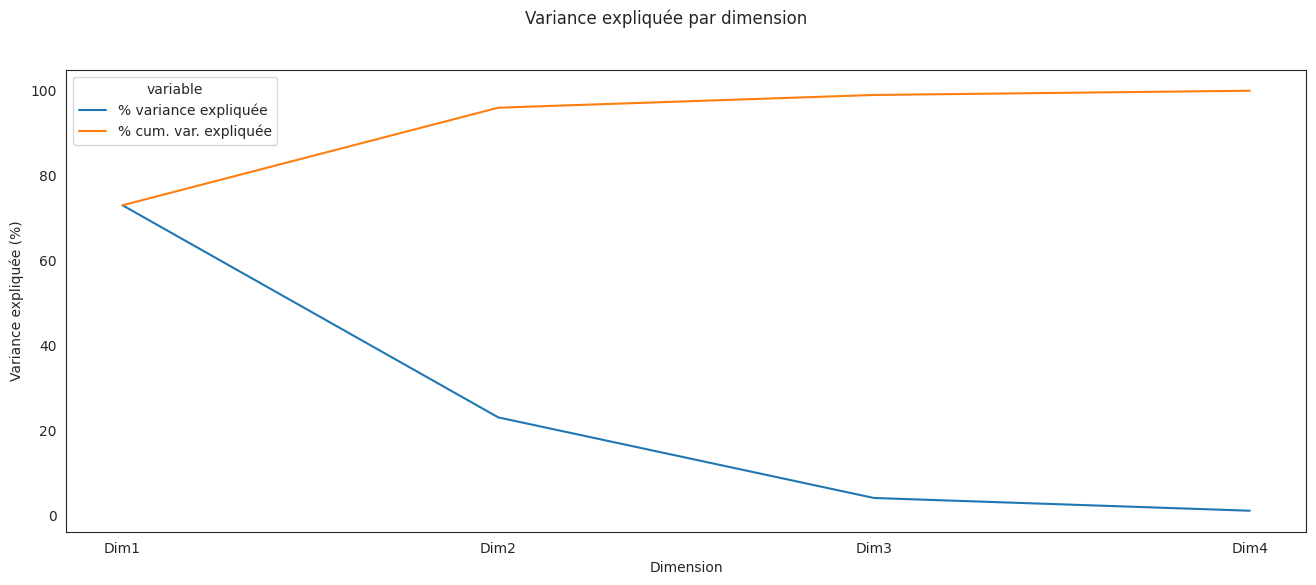

In [16]:
plt.figure(figsize=(16,6))

eig2 = eig.filter(["Dimension", "% variance expliquée", "% cum. var. expliquée"]).melt(id_vars="Dimension")
g_eig2 = sns.lineplot(data = eig2, x="Dimension", y="value", hue="variable")
                 

g_eig2.set(ylabel="Variance expliquée (%)")
g_eig2.figure.suptitle("Variance expliquée par dimension")

plt.show()

### Visualisation du nuage de points

Récupération des dimensions avec les espèces pour la représentation

In [17]:
iris_pca = pca.transform(scale(iris[iris.columns[:4]]))
iris_pca_df = pd.DataFrame({
    "Dim1" : iris_pca[:,0], 
    "Dim2" : iris_pca[:,1], 
    "Species" : iris.Species
})
iris_pca_df.head()

,Dim1,Dim2,Species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


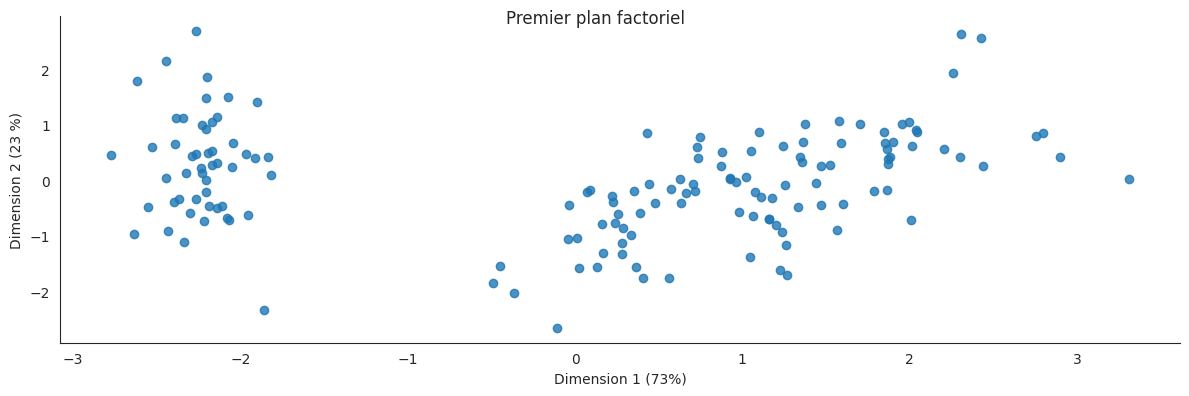

In [18]:
g_pca = sns.lmplot(data=iris_pca_df, x="Dim1", y="Dim2", fit_reg=False, height=4, aspect=3)
g_pca.set(xlabel="Dimension 1 (73%)", ylabel="Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

### Représentation des variables

Obligation de faire un calcul pour avoir les coordonnées des variables

In [19]:
pd.DataFrame(pca.components_.T, columns=['PC'+str(i) for i in range(1, 5)], index=iris.columns[:4])

,PC1,PC2,PC3,PC4
Sepal Length,0.521066,0.377418,-0.719566,-0.261286
Sepal Width,-0.269347,0.923296,0.244382,0.123510
Petal Length,0.580413,0.024492,0.142126,0.801449
Petal Width,0.564857,0.066942,0.634273,-0.523597


In [20]:
coordvar = pca.components_.T * np.sqrt(pca.explained_variance_)
coordvar_df = pd.DataFrame(coordvar, columns=['PC'+str(i) for i in range(1, 5)], index=iris.columns[:4])
coordvar_df

,PC1,PC2,PC3,PC4
Sepal Length,0.893151,0.362039,-0.276581,-0.037732
Sepal Width,-0.461684,0.885673,0.093934,0.017836
Petal Length,0.994877,0.023494,0.054629,0.115736
Petal Width,0.968212,0.064214,0.243797,-0.075612


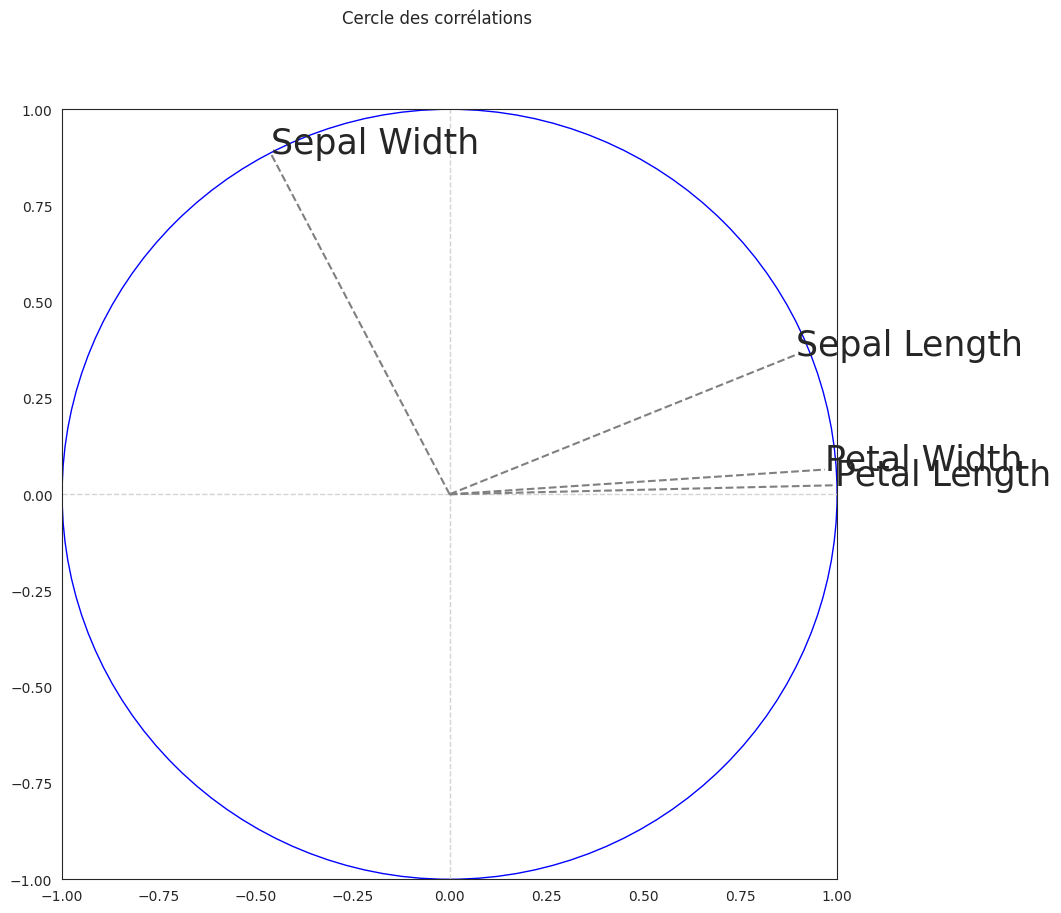

In [21]:
fig, axes = plt.subplots(figsize =(10,10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x=0, color='lightgray', linestyle ='--', linewidth=1)
axes.axhline(y=0, color='lightgray', linestyle ='--', linewidth=1)
for j in range(coordvar_df.shape[0]):
    axes.text(coordvar_df["PC1"][j],coordvar_df["PC2"][j], coordvar_df.index[j], size=25)
    axes.plot([0,coordvar_df["PC1"][j]], [0,coordvar_df["PC2"][j]], color="gray", linestyle='dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

### Représentation simultanée

Analyse conjointe des deux nuages (individus et variables)

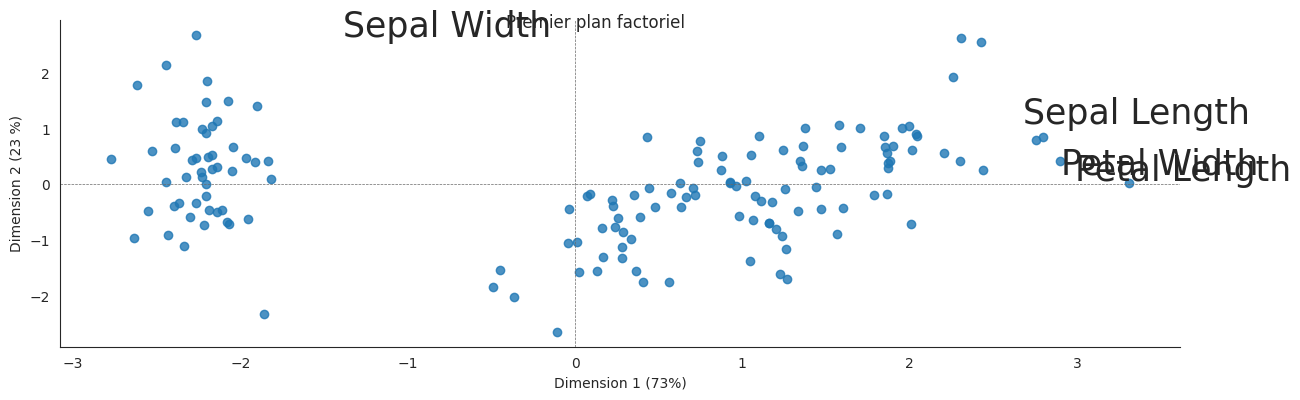

In [22]:
g_pca = sns.lmplot(data = iris_pca_df, x="Dim1", y="Dim2", fit_reg=False, height=4, aspect=3)

g_pca.set(xlabel="Dimension 1 (73%)", ylabel="Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

axes = g_pca.axes[0,0]
for j in range(coordvar_df.shape[0]):
    axes.text(3 * coordvar_df["PC1"][j],
              3 * coordvar_df["PC2"][j], 
              coordvar_df.index[j], size = 25)
plt.axvline(x=iris_pca_df.Dim1.mean(), linewidth=.5, color="dimgray", linestyle="--")
plt.axhline(y=iris_pca_df.Dim2.mean(), linewidth=.5, color="dimgray", linestyle="--")

plt.show()

### Visualisation des espèces sur le premier plan factoriel

Gros intérêt de l'ACP : représenter une variable qualitative sur le plan factoriel

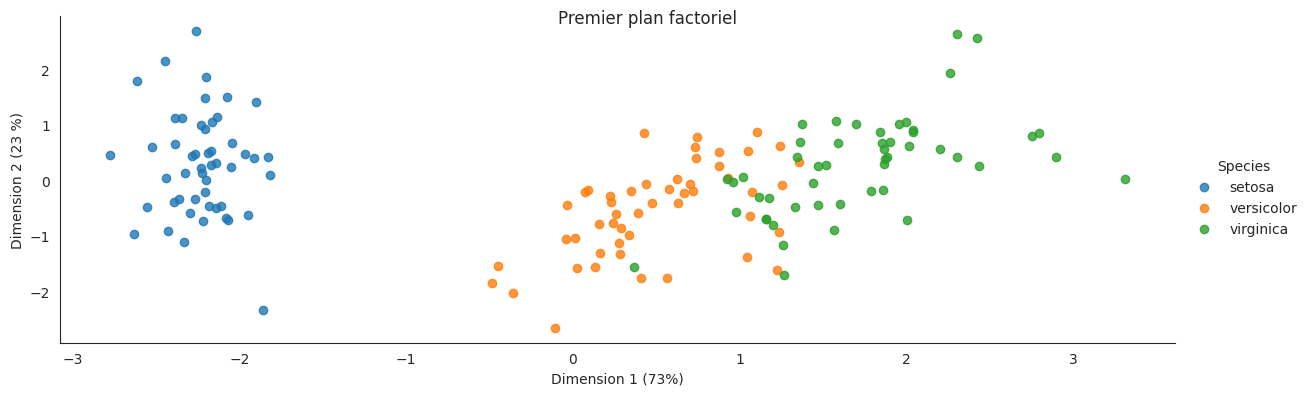

In [23]:
g_pca = sns.lmplot(data=iris_pca_df, x="Dim1", y="Dim2", hue="Species",  fit_reg=False, height=4, aspect=3)

g_pca.set(xlabel="Dimension 1 (73%)", ylabel="Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

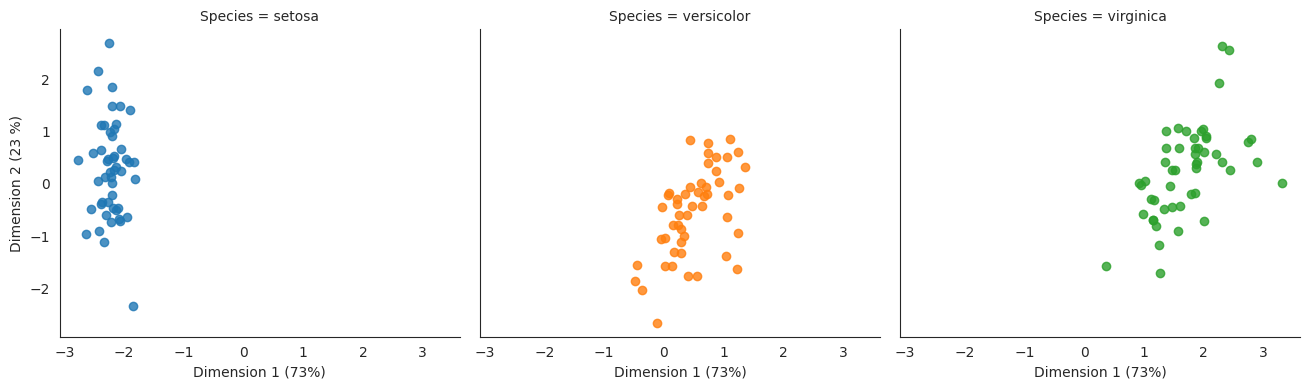

In [24]:
g_pca2 = sns.lmplot(data=iris_pca_df, x="Dim1", y="Dim2", hue="Species", col="Species", fit_reg=False, height=4, aspect=1.1)
g_pca2.set(xlabel="Dimension 1 (73%)", ylabel="Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()